In [23]:
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
# example
time_stamp = pd.Timestamp(datetime(2017, 1, 1))
time_stamp

Timestamp('2017-01-01 00:00:00')

In [7]:
# get month, week day, day
time_stamp.month, time_stamp.day_name(), time_stamp.day

(1, 'Sunday', 1)

### pd.Period & frequencies

In [10]:
period = pd.Period('2018-04-12', 'D')
period

Period('2018-04-12', 'D')

In [11]:
# date after 27 days
period + 27


Period('2018-05-09', 'D')

### Date sequeneces

In [12]:
seq = pd.date_range(start='2021-1-1',
                    periods=12,
                    freq='M')
seq

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='M')

In [13]:
seq_df = pd.DataFrame({'data': seq})
seq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    12 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 224.0 bytes


### Week sequence

In [16]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-01-01',
                           periods=7, freq='D')

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())


6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


### Google

In [17]:
google = pd.read_csv('data/stock_data/google.csv')
google.head(3)

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN


In [18]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [22]:
google['Date'] = pd.to_datetime(google['Date'], infer_datetime_format=True)

google.set_index('Date', inplace=True)

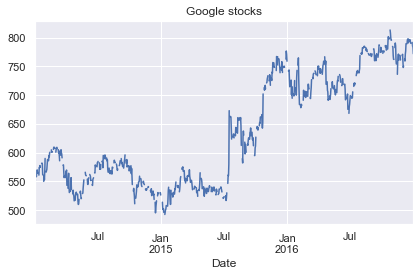

In [26]:
google.Close.plot(title='Google stocks')
plt.tight_layout()
plt.show()

### NYC

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1762 non-null   object 
 1   JNJ     1762 non-null   float64
 2   JPM     1762 non-null   float64
 3   XOM     1762 non-null   float64
dtypes: float64(3), object(1)
memory usage: 55.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
dtypes: float64(3)
memory usage: 55.1 KB
None


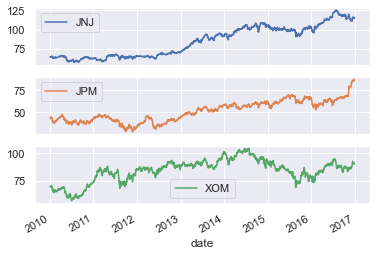

In [27]:
data = pd.read_csv('data/stock_data/nyse.csv')

# Inspect data
print(data.info())

# Convert the date column to datetime64
data['date'] = pd.to_datetime(data['date'])

# Set date column as index
data.set_index('date', inplace=True)

# Inspect data
print(data.info())

# Plot data
data.plot(subplots=True)
plt.show()

### Yahoo

In [32]:
yahoo = pd.read_csv('data/stock_data/yahoo.csv',
                    infer_datetime_format=True,
                    parse_dates=['date'])
yahoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    782 non-null    datetime64[ns]
 1   price   756 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.3 KB


In [35]:
# set index
yahoo.set_index('date', inplace=True)

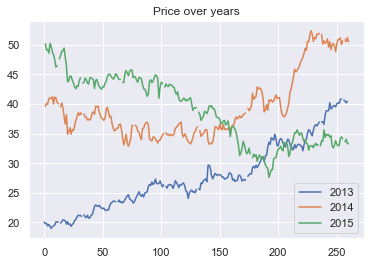

In [37]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot(title='Price over years')
plt.show()

### Daily carbon monoxide concentration in NYC, LA and Chicago from 2005-17.

In [38]:
co = pd.read_csv('data/air_quality/co_cities.csv',
                 parse_dates=['date'],
                 infer_datetime_format=True)
co.head(3)

,date,Chicago,Los Angeles,New York
0,2005-01-01,0.317763,0.777657,0.639830
1,2005-01-03,0.520833,0.349547,0.969572
2,2005-01-04,0.477083,0.626630,0.905208


In [39]:
# set index
co.set_index('date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None


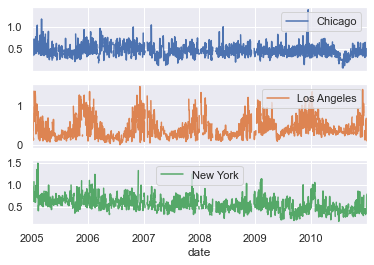

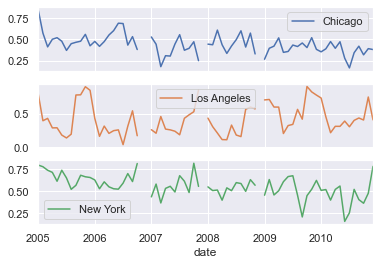

In [40]:
# Inspect data
print(co.info())

# Set the frequency to calendar daily
co = co.asfreq('D')

# Plot the data
co.plot(subplots=True)
plt.show()

# Set frequency to monthly
co = co.asfreq('M')

# Plot the data
co.plot(subplots=True)
plt.show()


## Basic time-series calculations
- shift or lag (backward or forward in time)
- get the difference in value for a given time period
- compute the percent change over any number of periods

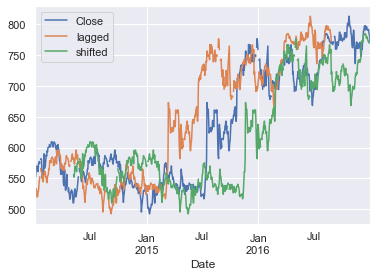

In [41]:
# Import data here
google = pd.read_csv('data/stock_data/google.csv',
                     parse_dates=['Date'],
                     index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)

# Plot the google price series
google.plot()
plt.show()


### Sub, diff, shift

In [42]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo['price'].shift(periods=30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo['price'] - yahoo['shifted_30']

# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(periods=30)

# Inspect the last five rows of price
print(yahoo.tail())

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo['change_30'].sub(yahoo['diff_30']).value_counts())

            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64
0.0    703
dtype: int64


The last time series method you have learned about in the video was .pct_change(). Let's use this function to calculate returns for various calendar day periods, and plot the result to compare the different patterns.

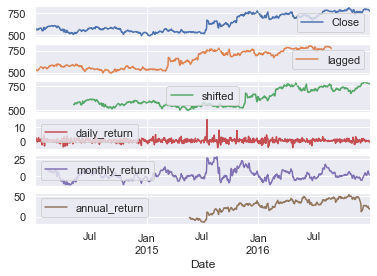

In [43]:
# Create daily_return
google['daily_return'] = google['Close'].pct_change(periods=1).mul(100)

# Create monthly_return
google['monthly_return'] = google['Close'].pct_change(periods=30).mul(100)

# Create annual_return
google['annual_return'] = google['Close'].pct_change(periods=360).mul(100)

# Plot the result
google.plot(subplots=True)
plt.show()